In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
imgLeft=cv2.imread("../img/panorama_left.jpg")
imgRight=cv2.imread("../img/panorama_left.jpg")

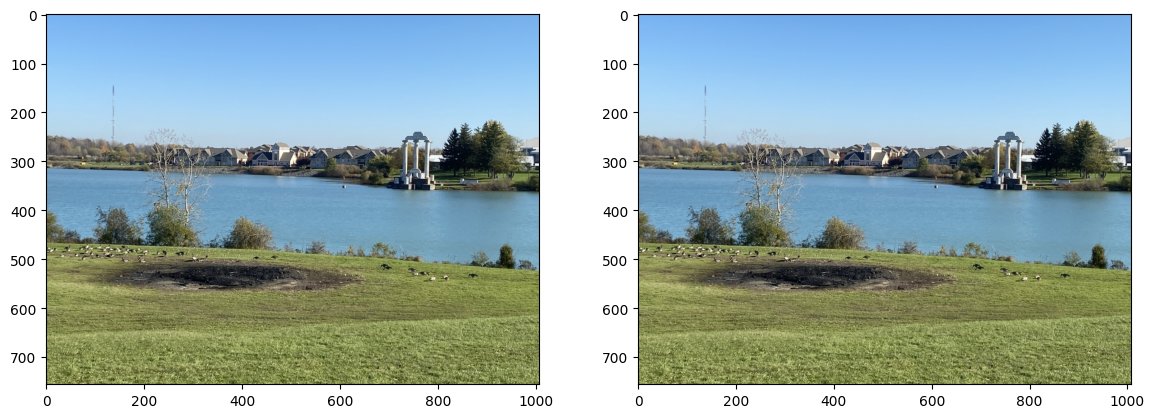

In [3]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
# BGR to RGB [..., ::-1]
plt.imshow(imgLeft[..., ::-1])
plt.subplot(1, 2, 2)
plt.imshow(imgRight[..., ::-1])

In [4]:
sift = cv2.SIFT_create()

In [5]:
kp1, des1 = sift.detectAndCompute(imgLeft, None)
kp2, des2 = sift.detectAndCompute(imgRight, None)

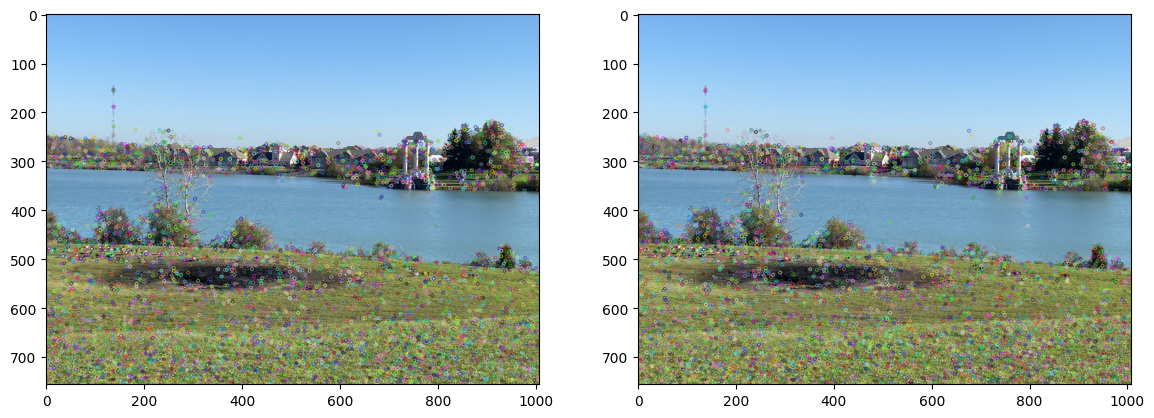

In [6]:
newImgLeft = cv2.drawKeypoints(imgLeft, kp1, None)
newImgRight = cv2.drawKeypoints(imgRight, kp2, None)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
# BGR to RGB [..., ::-1]
plt.imshow(newImgLeft[..., ::-1])
plt.subplot(1, 2, 2)
plt.imshow(newImgRight[..., ::-1])

In [18]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches_bf = bf.match(des1, des2)
matches_bf = sorted(matches_bf, key=lambda x: x.distance)

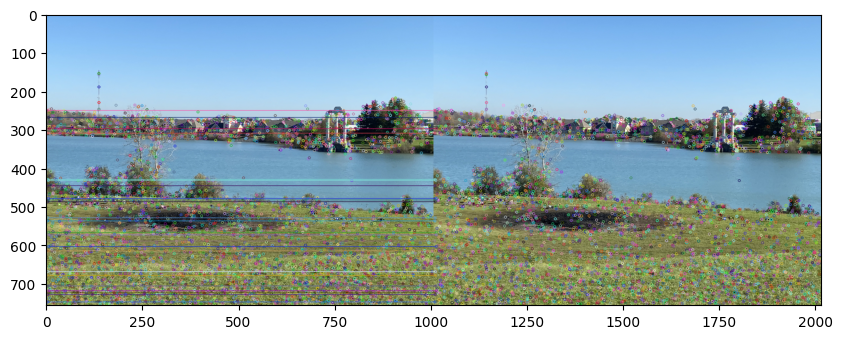

In [19]:
num=30
img_matches_bf = cv2.drawMatches(imgLeft, kp1, imgRight, kp2, matches_bf[:num], None)

plt.figure(figsize=(10, 5))
plt.imshow(img_matches_bf[..., ::-1])

In [21]:
src_points = np.float32([kp1[match.queryIdx].pt for match in matches_bf]).reshape(-1, 1, 2)
dst_points = np.float32([kp2[match.trainIdx].pt for match in matches_bf]).reshape(-1, 1, 2)

In [22]:
homography, _ = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5.0)

In [24]:
result = cv2.warpPerspective(imgLeft, homography, (imgLeft.shape[1], imgRight.shape[0]))

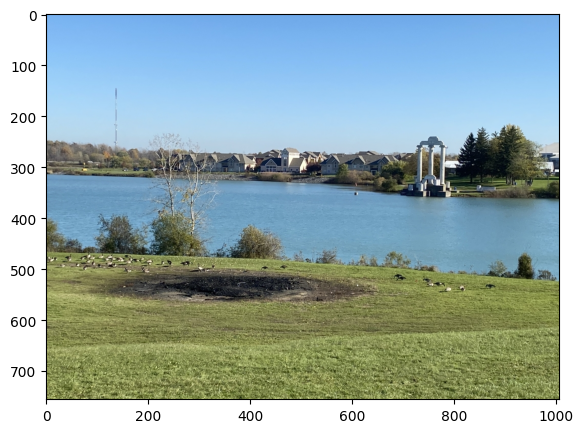

In [26]:
alpha = 0.5  # blending factor
blended_image = cv2.addWeighted(result, alpha, imgRight, 1 - alpha, 0)

plt.figure(figsize=(10, 5))
plt.imshow(blended_image[..., ::-1])